In [1]:
#  Linear Regression Project

Stock market prediction
1.  Download HW3 data from the folder data in Documents on Blackboard, which lists daily signal and price values of S&P 500.
	
2.  The aim of this project is to test a data source (signal, second column in data.csv) which claims to be predictive of future returns of the SP500 index (spy_close_price, third column in data.csv).  We use SPY (SPDR S&P 500 ETF) as a proxy for the SP500 index. 

3.  The signal and spy_close_price are both received at the same time at the end of the day on the date listed in column 1.  We do not know how the signal is generated or have a prior conviction about the forecast horizon over which the signal is supposed to be effective, nor its stationarity. 

4.  The first step in this endeavor is data cleaning.  Assume all values in data.csv are potentially suspect, and please identify any errors in the data, flag them with a note, and suggest a corrected value or if advisable, you may choose to ignore them for purposes of your analysis.  Please explain what types of analysis you did to identify the errors, and provide any assumptions/intuition/formulas/scripts you may have used to help you find them.

5.  Given the cleaned/censored version of the data you created in (4), please perform an analysis of the predictive power of signal with respect to spy_close_price.  This analysis must be based on linear regression. report the performace of linear regression model, scatter plots befor and after clearning the data. and explain if the signal can be a good predictive for the stock price. Also compute the correlation between the signal and price.


Please document all experiment(s) you performed (including relevant code, package references, etc) and summarize your conclusions about the viability and shortcomings of this signal as a predictor of spy_close_price, including any materials you feel are appropriate to support your conclusions (eg, graphs, tables, etc).  Use this jupyter notebook file.




#  Importing the Data 

In [4]:
# Import statements
import pandas as pd
import numpy as np

# Reading the file
filepath = '/Users/asadimam270/Downloads/data.csv'
data = pd.read_csv(filepath)
data.head()

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


                        Separating independent and dependent variables

In [5]:
# Dependent Variable
X = data["signal"].values

# Independent Variable 
Y = data["spy_close_price"].values

# Visualizing the Uncleaned data

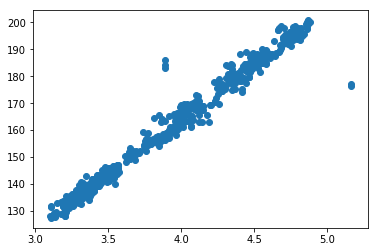

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatterplot 
plt.scatter(X,Y)

#                              Cleaning the Data for Analysis

                                    Missing Value Test

In [7]:
data.isnull().sum()

date               0
signal             0
spy_close_price    0
dtype: int64

######                        Dealing With Outliers of the Dependent Variable

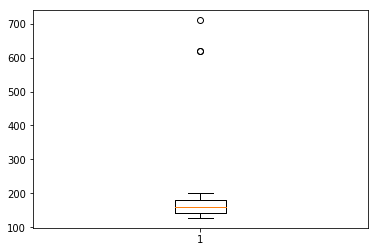

In [8]:
# Visualizing outliers for Y
import matplotlib.pyplot as plt
%matplotlib inline

# create box and whisker plot
plt.boxplot(Y)
# show line plot
plt.show()

In [9]:
print("Replacing all elements of the dependent variable which are greater than 500 with mean")
Y[Y > 500] = Y.mean()
print(Y)

Replacing all elements of the dependent variable which are greater than 500 with mean
[127.495      127.7        128.04       127.71       128.02
 129.13       129.2        129.51       128.84       129.34
 130.77       131.46       131.95       131.61       131.46
 132.56       131.88       131.82       131.37       131.32
 132.47       132.68       134.54       134.45       134.79
 135.19       135.36       134.361      135.36       135.19
 134.56       136.049      136.41       136.47       136.032
 136.631      136.93       137.16       137.559      137.02
 137.73       137.312      136.75       134.75       135.69
 137.04       137.57       137.58       140.062      139.91
 140.72       140.3        140.85       140.44       140.21
 139.2        139.65       141.61       141.17       140.47
 140.23       140.81       141.84       141.26       139.86
 139.79       138.22       135.9        137.         138.79
 137.14       137.05       139.082      138.61       137.72
 137.95      

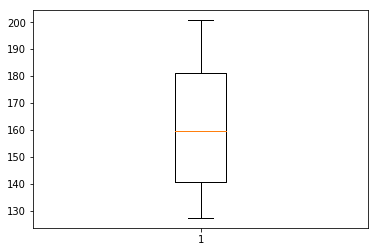

In [10]:
# create box and whisker plot
plt.boxplot(Y)
# show line plot
plt.show()

######                        Dealing With Outliers of the Independent Variable

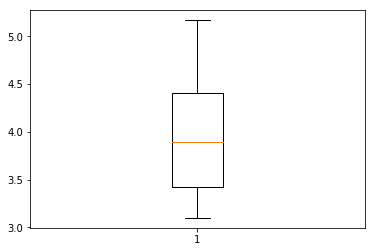

In [24]:
# Visualizing outliers for X
import matplotlib.pyplot as plt
%matplotlib inline

# create box and whisker plot
plt.boxplot(X)
# show line plot
plt.show()

In [12]:
print("Replacing all elements of the independent variable which are greater than 100 with mean")
X[X > 100] = X.mean()
print(X)

Replacing all elements of the independent variable which are greater than 100 with mean
[ 3.10776699e+00  3.10728155e+00  3.09975728e+00  3.13422330e+00
  3.13592233e+00  3.14344660e+00  3.12718447e+00  3.13932039e+00
  3.17402913e+00  3.19077670e+00  3.20266990e+00  3.19441748e+00
  3.19077670e+00  3.21747573e+00  3.20097087e+00  3.19951456e+00
  3.18859223e+00  3.18737864e+00  3.21529126e+00  3.22038835e+00
  3.26334951e+00  3.26553398e+00  3.27160194e+00  3.28131068e+00
  3.28543689e+00  3.26118932e+00  3.28543689e+00  3.28131068e+00
  3.26601942e+00  3.30216019e+00  3.31092233e+00  3.31237864e+00
  3.30174757e+00  3.31628641e+00  3.32354369e+00  3.32912621e+00
  3.33881068e+00  3.32572816e+00  3.34296117e+00  3.33281553e+00
  3.31917476e+00  3.29344660e+00  3.27063107e+00  3.32621359e+00
  3.33907767e+00  3.33932039e+00  3.39956311e+00  3.39587379e+00
  3.41553398e+00  3.40533981e+00  3.41868932e+00  3.40873786e+00
  3.40315534e+00  3.37864078e+00  3.38956311e+00  3.43713592e+00
  

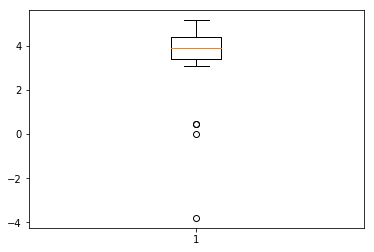

In [13]:
# create box and whisker plot
plt.boxplot(X)
# show line plot
plt.show()

In [14]:
print("Now Replacing all elements of the independent variable which are less than 2 with mean")
X[X < 2] = X.mean()
print(X)

Now Replacing all elements of the independent variable which are less than 2 with mean
[3.10776699 3.10728155 3.09975728 3.1342233  3.13592233 3.1434466
 3.12718447 3.13932039 3.17402913 3.1907767  3.2026699  3.19441748
 3.1907767  3.21747573 3.20097087 3.19951456 3.18859223 3.18737864
 3.21529126 3.22038835 3.26334951 3.26553398 3.27160194 3.28131068
 3.28543689 3.26118932 3.28543689 3.28131068 3.26601942 3.30216019
 3.31092233 3.31237864 3.30174757 3.31628641 3.32354369 3.32912621
 3.33881068 3.32572816 3.34296117 3.33281553 3.31917476 3.2934466
 3.27063107 3.32621359 3.33907767 3.33932039 3.39956311 3.39587379
 3.41553398 3.40533981 3.41868932 3.40873786 3.40315534 3.37864078
 3.38956311 3.43713592 3.42645631 3.40946602 3.40364078 3.41771845
 3.44271845 3.42864078 3.39466019 3.39296117 3.35485437 3.29854369
 3.32524272 3.36868932 3.32864078 3.32645631 3.3757767  3.36432039
 3.34271845 3.34830097 3.32014563 3.33276699 3.37839806 3.40194175
 3.40752427 3.39490291 3.41601942 3.4059466 

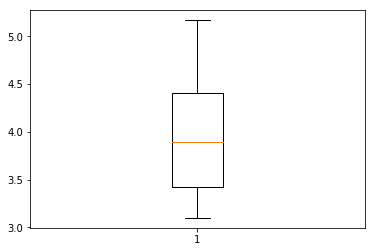

In [15]:
# create box and whisker plot
plt.boxplot(X)
# show line plot
plt.show()

# Performing Analysis on the Cleaned Data

In [16]:
# Import Statements
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [18]:
# fit the regression model
regressor = LinearRegression()
regressor.fit(X_test.reshape(-1,1) ,Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
Y_predict = regressor.predict(X_test.reshape(-1,1))

In [20]:
Y_predict

array([184.26303242, 176.50269809, 165.49193662, 145.39354266,
       178.6825673 , 186.65604436, 146.06203588, 143.52369931,
       140.90785627, 164.21792417, 157.41673227, 210.78384026,
       131.91710691, 164.21792417, 140.10372675, 162.21244453,
       135.43396253, 177.70404825, 195.99557283, 137.08097481,
       129.6016014 , 142.99084238, 149.42872274, 176.34768517,
       134.90110564, 145.92639959, 139.40616861, 137.68358753,
       183.4589029 , 135.76336498, 183.64298072, 140.66564859,
       185.76472008, 165.43865091, 163.82070357, 187.78957637,
       151.71031915, 145.87795806, 177.11306146, 168.19884974,
       194.03853472, 173.29586829, 177.46184056, 184.20490256,
       155.74065508, 158.40493966, 169.9534022 , 182.8388512 ,
       164.53763833, 183.48796781, 155.895668  , 180.02924204,
       183.4589029 , 195.90837806, 150.12143673, 178.1845883 ,
       163.82070357, 139.41585694, 152.09785146, 134.53294996,
       156.4188366 , 141.18881719, 155.38218773, 180.45

###### Calculating the mean square 

In [21]:
# Calculating the mean square for Error 
mean_squared_error(Y_test,Y_predict)

13.955863620130062

###### Calculating the $R^2$ value

In [22]:
r2_score(Y_test, Y_predict)  

0.9670753789043635

# Visualizing the model

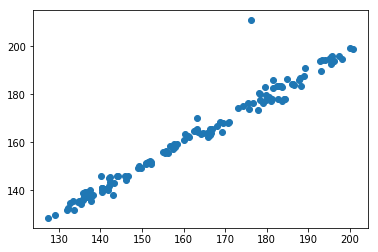

In [23]:
# Scatterplot 
plt.scatter(Y_test,Y_predict)

The high $R^2$ value of 0.9670753789043635 and the small MSE value of 13.955863620130062 shows that this is a good model. This is also backed up the the visual result in scatterplot. 

### *Helpful Websites*

<https://www.youtube.com/watch?v=NUXdtN1W1FE>